# Nama : Muhammad Iffandi
# Nim : 2209106006
# Praktikum : Kecerdasan Buatan A1

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Import Library yang akan digunakan

In [2]:
df = pd.read_csv('nintendo3ds.csv')
df.head()

,Unnamed: 0,slug,playtime,released,rating,rating_top,ratings_count,reviews_text_count,added,metacritic,...,updated,tags,reviews_count,genres,yet,owned,beaten,toplay,dropped,playing
0,0,terraria,12,5/16/2011,4.41,4,1384,6,7304,81.0,...,2020-12-07T19:51:06,"Singleplayer, Steam Achievements",1395,"Platformer, Indie",237,5518,603,94,729,123
1,1,lego-lord-of-the-rings,3,9/28/2012,3.40,4,409,1,3640,80.0,...,2019-10-23T14:56:48,"Singleplayer, Для одного игрока",410,"Casual, Platformer",265,3000,205,29,115,26
2,2,minecraft,26,5/10/2009,4.41,5,1339,8,3640,83.0,...,2020-09-08T16:50:31,"Multiplayer, Sandbox",1359,"Action, Arcade",38,2049,689,48,434,382
3,3,the-binding-of-isaac-rebirth,35,11/4/2014,4.31,5,726,5,3297,86.0,...,2019-12-29T20:04:49,"Singleplayer, Для одного игрока",732,"Action, RPG",74,2464,380,63,225,91
4,4,lego-the-hobbit,2,4/8/2014,3.40,4,289,0,3194,70.0,...,2019-10-23T14:56:45,"Singleplayer, Для одного игрока",289,"Family, Adventure",285,2665,132,24,75,13


### Untuk membaca dataset dan menampilkan 5 data pertama dalam dataset

## 1. Split dataset menjadi train dan test

In [3]:
X = df[['rating_top', 'ratings_count', 'playtime', 'reviews_text_count']]
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Melakukan split data dengan rasio 80:20

## 2. Melakukan preprocessing pada dataset

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Melakukan preprocessing dengan fungsi StandardScaler pada dataset untuk mengubah skala atau rentang nilai dari fitur-fitur dalam dataset sehingga fitur-fitur tersebut memiliki distribusi yang serupa dan tidak memiliki skala yang berbeda-beda.

## 3. Membangun sequential model dan melakukan kompilasi model

In [5]:
model = keras.Sequential([
    layers.Dense(units=32, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

### Syntax diatas digunakan untuk membuat, mengkonfigurasi, dan mengkompilasi model neural network dengan menggunakan library Keras.

### 1. model = keras.Sequential([...]): Ini adalah langkah pertama dalam membuat model neural network.

### 2. layers.Dense(units=32, activation='relu', input_dim=X_train.shape[1]): Ini adalah lapisan pertama dalam model.

### 3. layers.Dense(units=16, activation='relu'): Ini adalah lapisan kedua dalam model. Lapisan ini memiliki 16 neuron dan menggunakan fungsi aktivasi ReLU.

### 4. layers.Dense(units=1): Ini adalah lapisan output, dan karena target yang digunakan adalah rating (variabel kontinu), maka hanya ada satu neuron dalam lapisan output.

### 5. model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae']): Digunakan untuk melakukan kompilasi model yang telah dibuat.

## 4. Melatih model neural network

In [6]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

### 1. X_train dan y_train: Data pelatihan yang digunakan untuk melatih model.

### 2. epochs=100: Jumlah berapa kali iterasi pelatihan akan dijalankan.

### 3. batch_size=32: Jumlah sampel data yang digunakan pada setiap iterasi pelatihan.

### 4. validation_data=(X_test, y_test): Data validasi yang digunakan untuk mengukur performa model selama pelatihan.

## 5. Evaluasi model menggunakan r2_score

In [7]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

11/11 [==============================] - 0s 2ms/step
R2 Score: 0.9614078453640726


### model yang saya latih memiliki kemampuan yang sangat baik dalam memprediksi target (rating) berdasarkan data yang digunakan dalam evaluasi.

## 6. Plot loss dan error 

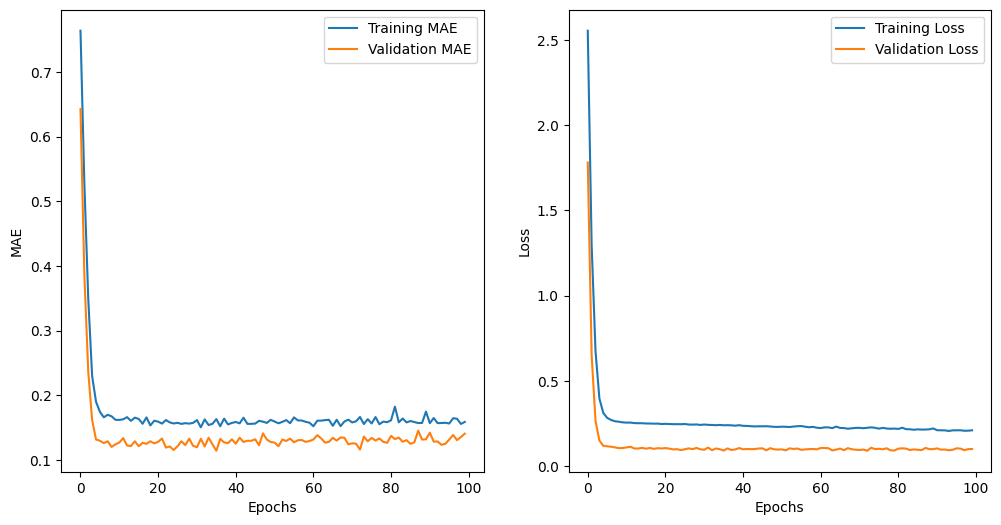

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()